<a href="https://colab.research.google.com/github/olivermontenegro/learning/blob/master/%5BAirbnb%5D_Cidade_de_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of Airbnb - Melbourne

Founded  in 2008 by three friends, Brian, Joe and Nathan, the [Airbnb](https://www.airbnb.com.br/) (Air Bed and Breakfast) started renting three mattressess for three persons with very different profiles (a half aged woman, an young indian guy and a family father). 

* In 2012 was already the best lodging platform in the world 
* At the end of 2018 Airbnb hosted more than 300 millions of people
* today is aross +220 countries, +100k cities and more than 7 million listings worldwide

Airbnb has an initiative of share its data on the website, where anyone can use it freely. By the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), is possible to get a great amount of data to develop projects and solutions for *Data Sciente*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**On this notebook you will find data analysis from 13 May, 2020, of Melbourne city, Victora, Australia.**

## Getting the Data
Data obtained from [Airbnb](http://insideairbnb.com/get-the-data.html).

As my first project as a Data Scientist, it was used a summarized dataset.

* `listing.csv` - *Summary information and metrics for listings in Melbourne (good for visualisations)* (13 de maio de 2020).


In [3]:
# getting the packaging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# import the file listings.csv to the DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/vic/melbourne/2020-05-13/visualisations/listings.csv")

## Data Analysis


**Glossary**

* `id` - id number generated to identify the property
* `name` - name announced
* `host_id` - host id number
* `host_name` - host name
* `neighbourhood_group` - if there is a neighbourhood association
* `neighbourhood` - neighbourhood name
* `latitude` - latitude coordinate
* `longitude` - longitude coordinate
* `room_type` - room type
* `price` - price to rent
* `minimum_nights` - minimun nights to reserve
* `number_of_reviews` - reviews of the service
* `last_review` - last review date
* `reviews_per_month` - reviews per month
* `calculated_host_listings_count` - how many properties does the host own
* `availability_365` - number of dates where the property is available


Below you will find a preview of the data.

In [ ]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76651,144.98074,Private room,36,4,145,2020-04-08,1.62,1,0
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,159,3,42,2020-03-15,0.35,10,0
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,99,1,148,2020-05-01,1.28,1,334
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.69729,145.00082,Private room,49,7,161,2019-09-19,1.39,3,0


### **Q1. How many attributes (variables) and entries our data set has? What are these variable types?**

In [5]:
# volume of the dataframe
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23862
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What percentage of missing values in the dataset?**

In [7]:
# missing values in decreasing order
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.212891
last_review                       0.212891
host_name                         0.000168
name                              0.000042
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **How is available the value distribution?** 

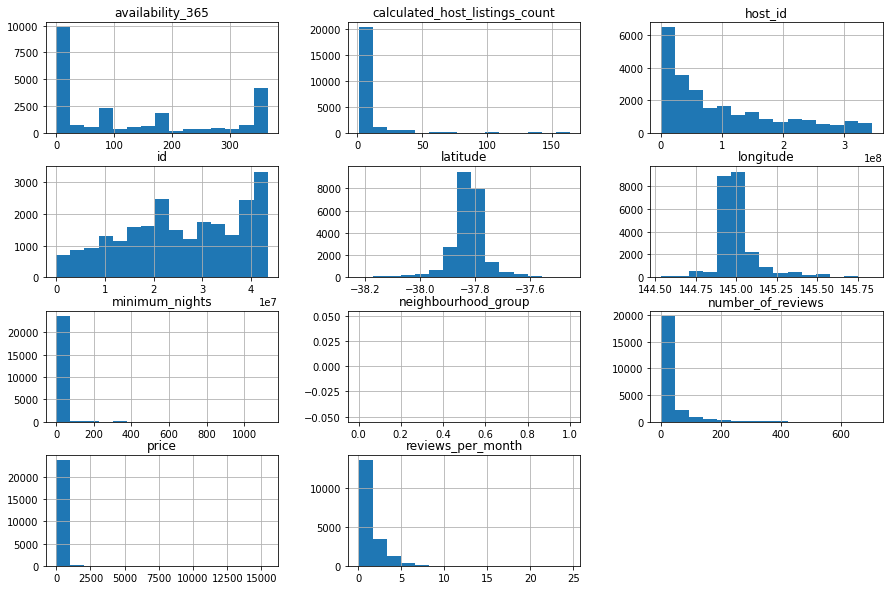

In [ ]:
# histogram charts before data processing
df.hist(bins=15,figsize=(15,10));

As we can see, we have some disparities in our data.
According to the charts, we don't have any neighbourhood data and there are rooms/properties with prices higher than AUD $15.000.

**Let's take a deep dive in it...**

### **Q4. Is there any outliers?**

In [ ]:
# analysis of `price`` variable
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23862.000000,23862.000000,23862.000000,18782.000000,23862.000000,23862.000000
mean,160.074973,4.901894,25.755972,1.268706,9.230576,130.367781
std,339.045759,25.919682,48.548669,1.450987,23.289246,140.590335
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,1.000000,1.000000,0.230000,1.000000,0.000000
50%,110.000000,2.000000,6.000000,0.750000,1.000000,88.000000
75%,170.000000,3.000000,27.000000,1.810000,5.000000,264.000000
max,15455.000000,1125.000000,703.000000,24.600000,164.000000,365.000000


Starting from the chart above, is possible to accept some hypothesis:

* The `price` variable has 75% of its distribution below 170, yet there is a max `price` of 15455.
* There are minimun nights (`minimum_nights`) of 365 days in an year.

#### Minimum nights Boxplot


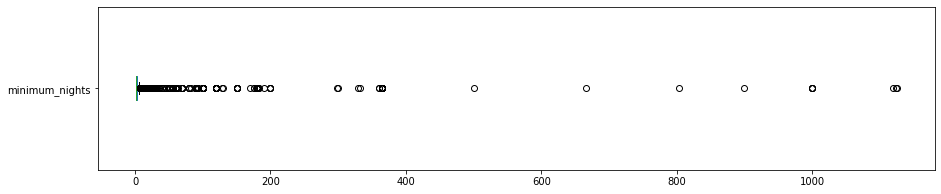

minimum_nights:
values above 30 days - 270 entries
1.1315%


In [20]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# minimum_nights above 30  days
print("minimum_nights:")
print("values above 30 days" + " - {} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Price Boxplot

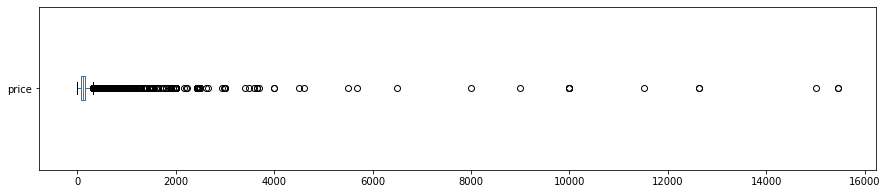


price: values above 1000
172 entries
0.7208%


In [23]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: values above 1000")
print("{} entries".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogram without outliers

After the `price` and `minimum_nights` outliers are identified, let's clean it from the *DataFrame* and plot one more time.

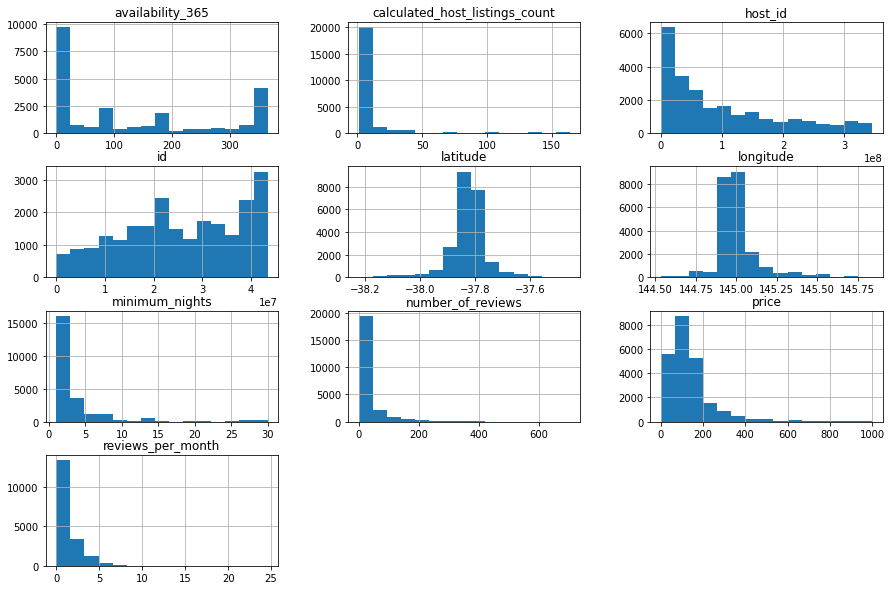

In [24]:
# remove the *outliers* to a new and clean DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot the histogram
df_clean.hist(bins=15, figsize=(15,10));

After the data processing removing some outliers from our dataframe, we have better view from the histogram, with data better plotted on our histograms.

### **Q5. What is the correlation between the variables**
The correlation coefficient establish the intensity between variables. To identify it will be used:

* A correlation matrix
* A *heatmap* from the previous correlation matrix, by `seaborn`

In [17]:
# correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.019848,-0.020907,-0.000514,0.041201,0.140025
minimum_nights,-0.019848,1.000000,-0.091389,-0.139830,0.076979,0.017590
number_of_reviews,-0.020907,-0.091389,1.000000,0.738693,-0.018379,0.128217
reviews_per_month,-0.000514,-0.139830,0.738693,1.000000,0.012340,0.121813
calculated_host_listings_count,0.041201,0.076979,-0.018379,0.012340,1.000000,0.148896
availability_365,0.140025,0.017590,0.128217,0.121813,0.148896,1.000000


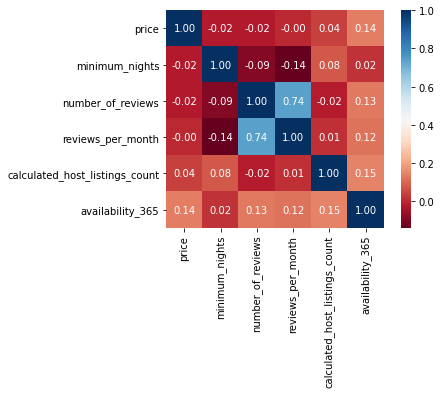

In [18]:
# heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. The type of property most rented on Airbnb**

The `room_type` variable column shows the type of the location announced on Airbnb. There are apartments, houses, hotel rooms, rooms and shared rooms available in the service.

Below we will se the types of rooms available on Melbourne city:

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14512
Private room        8133
Shared room          485
Hotel room           296
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.620068
Private room       0.346655
Shared room        0.020665
Hotel room         0.012612
Name: room_type, dtype: float64

### **Q7. What is the most expensive neighbourhood?**

To find the answer the `groupby()` function will demonstrate all the rows with the same value of the data set. Thereby the most expensives will be at top of the list.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Yarra Ranges    238.187042
Bayside         234.088773
Nillumbik       197.515789
Port Phillip    159.796083
Manningham      153.923841
Cardinia        152.711409
Melbourne       150.082675
Stonnington     150.065647
Frankston       149.175258
Boroondara      145.296943
Name: price, dtype: float64

The Yarra Ranges, Baysude and Nillumbik are the most expensives on the list.

In [26]:
# Yarra Ranges quantity
print(df_clean[df_clean.neighbourhood == "Yarra Ranges"].shape)
df_clean[df_clean.neighbourhood == "Yarra Ranges"]

(813, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32,157427,"Stone's Throw Studio, Belgrave",717024,Margaret,Yarra Ranges,-37.90605,145.35069,Entire home/apt,150,1,34,2020-01-25,0.33,2,318
33,161033,Healesville Yarra Valley Cottage,770883,Karen,Yarra Ranges,-37.63282,145.49766,Entire home/apt,80,2,234,2020-03-09,2.21,1,296
46,230790,Clarelee - Belgrave Accommodation,1197236,Clarelee,Yarra Ranges,-37.90514,145.35261,Entire home/apt,550,2,76,2020-03-15,1.10,1,351
66,277605,Angelus Retreat @ Mount Dandenong,1448773,Margaret Jiin,Yarra Ranges,-37.90560,145.39525,Entire home/apt,219,2,8,2019-09-29,0.08,2,365
71,289467,The Suite @ Angelus Retreat,1448773,Margaret Jiin,Yarra Ranges,-37.90546,145.39447,Entire home/apt,250,2,4,2019-06-09,0.07,2,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,43105219,Farm Stay- Selby - Dandenong Ranges- Cabin 2,3160757,Yvette,Yarra Ranges,-37.90953,145.38567,Entire home/apt,57,14,0,NaN,NaN,2,321
23628,43193230,Treetop Tower Residence in Belgrave Town Centre,11910401,Li,Yarra Ranges,-37.90552,145.35541,Entire home/apt,145,2,0,NaN,NaN,3,86
23781,43358468,Glamping Pod with Ensuite,345409657,Yarra Valley,Yarra Ranges,-37.68050,145.54872,Entire home/apt,206,1,0,NaN,NaN,1,361
23790,43367989,"Queen Studio, The Old Mechanics",287030127,Austin,Yarra Ranges,-37.65617,145.51476,Entire home/apt,165,1,0,NaN,NaN,3,322


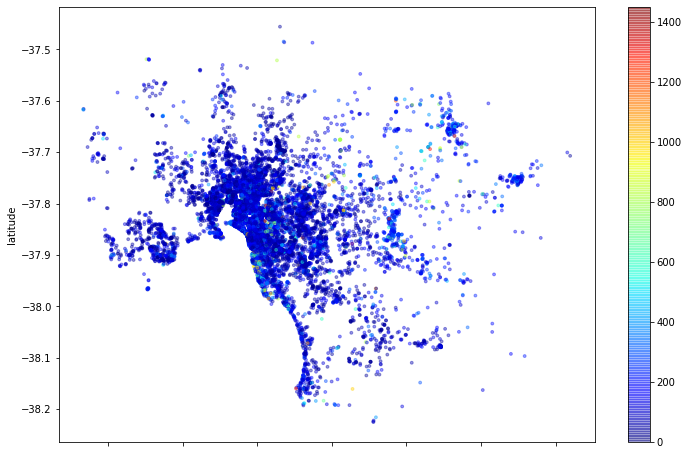

In [ ]:
# plot properties by latitude and longitude coordinates
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusion


Here was presented a superficial analysis of the Airbnb, Melbourne city, data.
As my first project as a data scientist, I decided to follow what was recommended by the course [*Data Science na Prática 2.0 Sigmoidal*](https://sigmoidal.ai/):
* Find the outliers in the data set
    - `Price` and `minimum_nights` variables with outliers
* Process the data
    - Clean `neibourhood_group` with no data available
* Present the conclusions from a clean data set